# Predicting Customer Churn in Telecommunications

# Group : 
### Lujain Ahmad 202201738 - Mai Waheed 202200556 - Zeina Ayman 202200351 - Farida Mohamed 202202579 - Habiba Khalil 202200720

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve

In [2]:
train = pd.read_csv("train.csv")
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
print(train.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [5]:
print(train.duplicated().sum())

0


In [6]:
# We can convert all the non numerical values into numerical values using LabelEncoder
Le = LabelEncoder()
train['state'] = Le.fit_transform(train['state']) 
train['area_code'] = Le.fit_transform(train['area_code'])
train['international_plan'] = Le.fit_transform(train['international_plan'])
train['voice_mail_plan'] = Le.fit_transform(train['voice_mail_plan'])
train['churn'] = Le.fit_transform(train['churn']) 

In [7]:
# Define X (features) and y (target)
X = train.drop(columns = ["churn"])  
y = train["churn"]                   
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [8]:
print('Class distribution before SMOTE:')
print(train['churn'].value_counts())

Class distribution before SMOTE:
churn
0    3652
1     598
Name: count, dtype: int64


In [9]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
# Display class distribution after SMOTE
print('Class distribution after SMOTE:')
print(y_train_smote.value_counts())

Class distribution after SMOTE:
churn
0    2931
1    2931
Name: count, dtype: int64


In [10]:
# Feature Engineering Example
train['total_full_day_minutes'] = train['total_day_minutes'] + train['total_eve_minutes'] + train['total_night_minutes']
train['total_full_day_calls'] = train['total_day_calls'] + train['total_eve_calls'] + train['total_night_calls']
train['total_full_day_charge'] = train['total_day_charge'] + train['total_eve_charge'] + train['total_night_charge']

In [11]:
# Drop the original columns now represented by derived features
columns_to_drop = ["total_day_minutes","total_eve_minutes","total_night_minutes","total_day_calls","total_eve_calls","total_night_calls","total_day_charge","total_eve_charge","total_night_charge"]
train = train.drop(columns = columns_to_drop)

In [12]:
print(train.duplicated().sum())

0


In [13]:
print(train.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
total_full_day_minutes           0
total_full_day_calls             0
total_full_day_charge            0
dtype: int64


In [14]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_full_day_minutes,total_full_day_calls,total_full_day_charge
0,35,107,1,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,31,137,1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,35,84,0,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,36,75,1,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,19,121,2,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [16]:
# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train_smote,y_train_smote)
# Train Random Forest
random_forest = RandomForestClassifier(random_state = 42,n_estimators = 100)
random_forest.fit(X_train_smote,y_train_smote)
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_smote,y_train_smote)
# Train SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
svm_model = SVC(kernel = 'rbf',probability = True,random_state = 42)
svm_model.fit(X_train_scaled,y_train_smote)
# Predict on Validation Set
y_val_pred_tree = decision_tree.predict(X_val)
y_val_pred_rf = random_forest.predict(X_val)
y_val_pred_nb = nb_model.predict(X_val)
y_val_pred_svm = svm_model.predict(X_val_scaled)
# Predict Probabilities for ROC-AUC
y_val_proba_tree = decision_tree.predict_proba(X_val)[:,1]
y_val_proba_rf = random_forest.predict_proba(X_val)[:,1]
y_val_proba_nb = nb_model.predict_proba(X_val)[:,1]
y_val_proba_svm = svm_model.predict_proba(X_val_scaled)[:,1]
# Evaluate Models
def evaluate_model(y_true,y_pred,y_proba):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    auc_roc = roc_auc_score(y_true,y_proba)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print("\nClassification Report:\n")
    print(classification_report(y_true,y_pred))
print("Decision Tree Performance:")
evaluate_model(y_val,y_val_pred_tree,y_val_proba_tree)
print("______________________________________________________")
print("\nRandom Forest Performance:")
evaluate_model(y_val,y_val_pred_rf,y_val_proba_rf)
print("______________________________________________________")
print("\nNaïve Bayes Performance:")
evaluate_model(y_val,y_val_pred_nb,y_val_proba_nb)
print("______________________________________________________")
print("\nSupport Vector Machine (SVM) Performance:")
evaluate_model(y_val,y_val_pred_svm,y_val_proba_svm)

Decision Tree Performance:
Accuracy: 0.84
Precision: 0.49
Recall: 0.80
AUC-ROC: 0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       721
           1       0.49      0.80      0.61       129

    accuracy                           0.84       850
   macro avg       0.72      0.82      0.75       850
weighted avg       0.89      0.84      0.86       850

______________________________________________________

Random Forest Performance:
Accuracy: 0.92
Precision: 0.74
Recall: 0.74
AUC-ROC: 0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       721
           1       0.74      0.74      0.74       129

    accuracy                           0.92       850
   macro avg       0.84      0.84      0.84       850
weighted avg       0.92      0.92      0.92       850

______________________________________________________

Naïve Bayes Pe

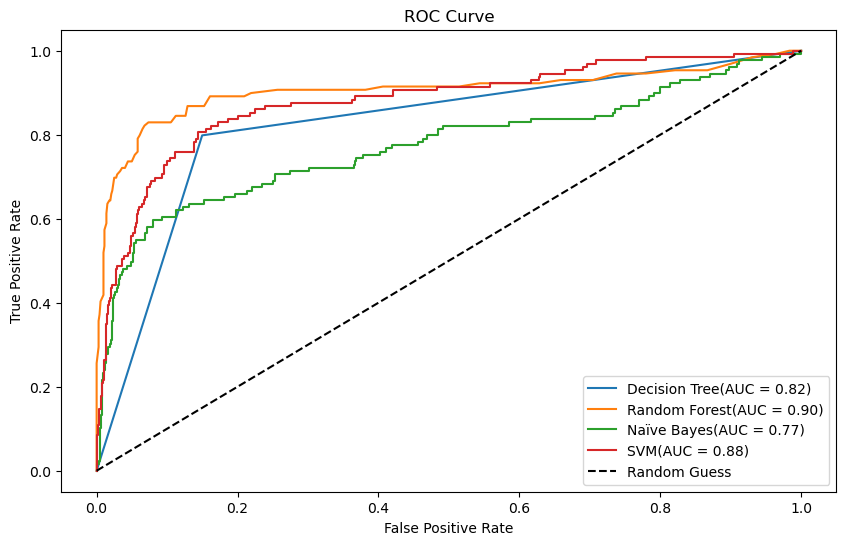

In [17]:
# Plot ROC Curve
def plot_roc_curve(y_true,y_proba,label):
    fpr,tpr,_ = roc_curve(y_true,y_proba)
    plt.plot(fpr,tpr,label = f"{label}(AUC = {roc_auc_score(y_true,y_proba):.2f})")
plt.figure(figsize = (10,6))
plot_roc_curve(y_val,y_val_proba_tree,"Decision Tree")
plot_roc_curve(y_val,y_val_proba_rf,"Random Forest")
plot_roc_curve(y_val, y_val_proba_nb, "Naïve Bayes")
plot_roc_curve(y_val, y_val_proba_svm, "SVM")
plt.plot([0,1],[0,1],'k--',label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

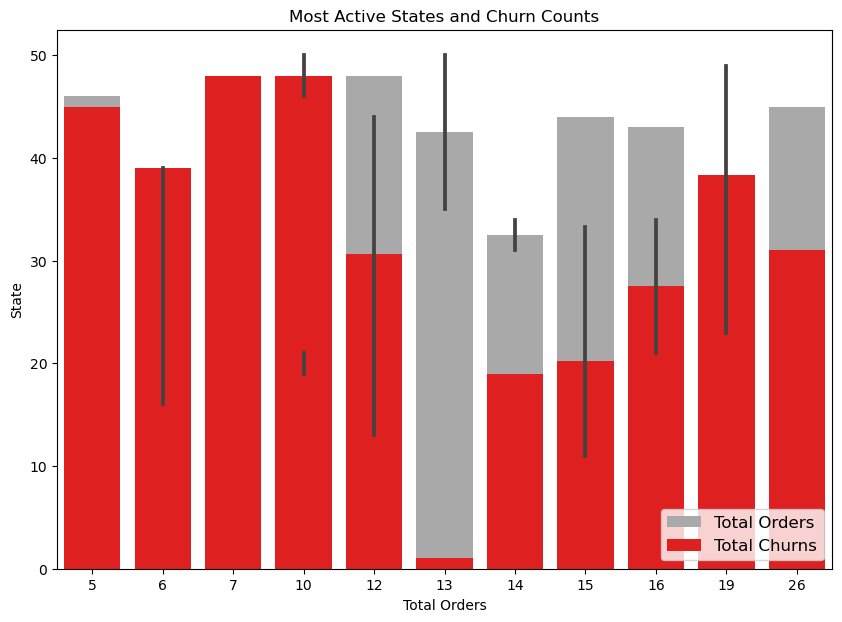

In [18]:
# Grouping data by 'state' to analyze total and churn counts
temp_df = train.groupby("state")["churn"].agg(['count','sum']).rename(columns = {'count':'total_orders','sum':'total_churns'})
temp_df = temp_df.sort_values('total_orders',ascending = False).reset_index()
# Visualizing the most popular states with total orders and churns
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.state[0:20],x = temp_df.total_orders[0:20],color = 'darkgray',label = "Total Orders")
ax = sns.barplot(y = temp_df.state[0:20],x = temp_df.total_churns[0:20],color = 'r',label = "Total Churns")
# Adjusting labels and title
ax.set_ylabel("State")
ax.set_xlabel("Total Orders")
ax.set_title("Most Active States and Churn Counts")
ax.legend(loc = 4,prop = {'size':12})
plt.show()

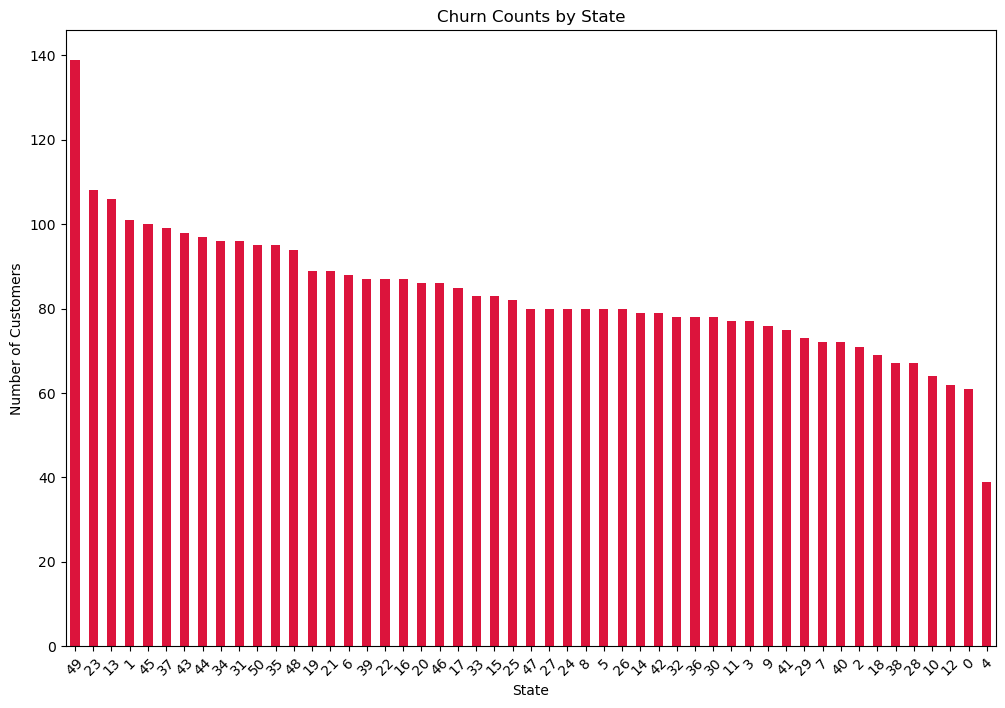

In [19]:
# Visualize churn counts by state
plt.figure(figsize = (12,8))
train['state'].value_counts().plot(kind = 'bar',color = 'crimson')
plt.title('Churn Counts by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 45)
plt.show()

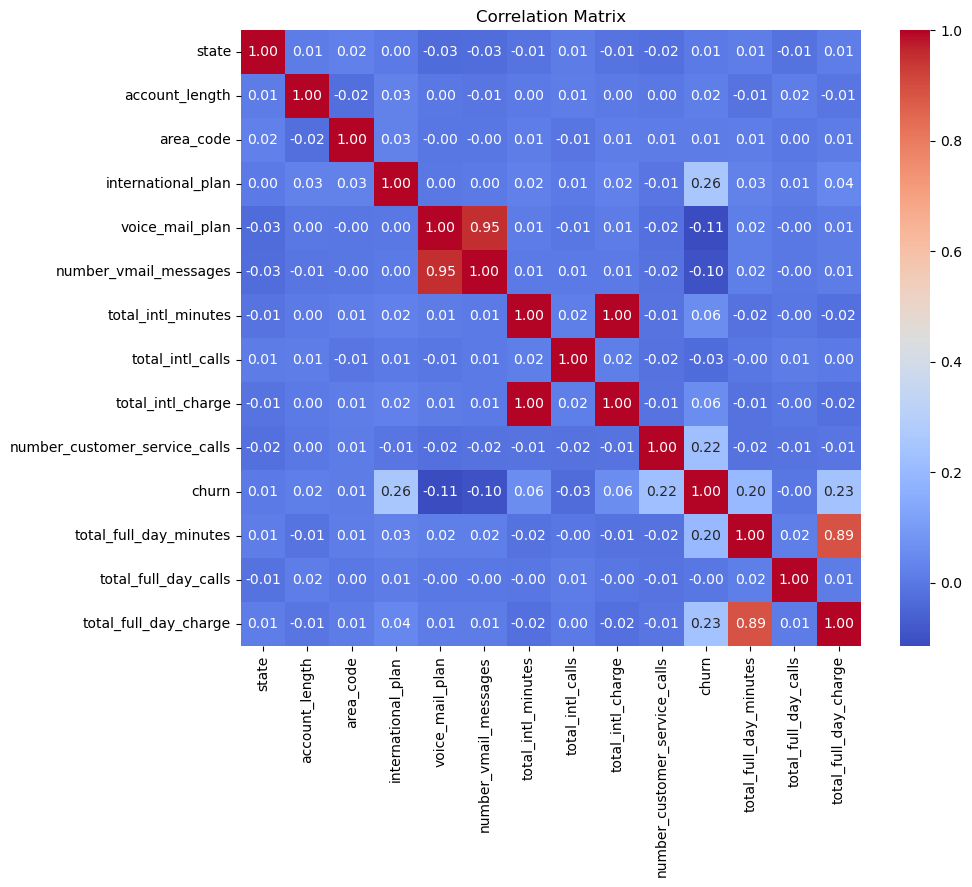

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(),annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Check for Overfitting
def check_overfitting(model,X_train,y_train,X_val,y_val):
    from sklearn.metrics import accuracy_score
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate accuracies
    train_acc = accuracy_score(y_train,y_train_pred)
    val_acc = accuracy_score(y_val,y_val_pred)
    print("Training Accuracy:",train_acc)
    print("Validation Accuracy:",val_acc)
    if train_acc - val_acc > 0.1:
        print("Warning: Model may be overfitting.")
    else:
        print("No significant overfitting detected.")
check_overfitting(random_forest,X_train,y_train,X_val,y_val)

Training Accuracy: 1.0
Validation Accuracy: 0.92
No significant overfitting detected.


In [22]:
# Testing
test = pd.read_csv("test.csv")
# Preprocessing: Apply Label Encoding as in training
Le = LabelEncoder()
test['state'] = Le.fit_transform(test['state'])
test['area_code'] = Le.fit_transform(test['area_code'])
test['international_plan'] = Le.fit_transform(test['international_plan'])
test['voice_mail_plan'] = Le.fit_transform(test['voice_mail_plan'])
test_features = test.drop(columns = ["id"]) 
predictions = random_forest.predict(test_features)
# Save predictions
output = pd.DataFrame({"id": test["id"],"churn": predictions})
output.to_csv("test_predictions.csv",index = False)
print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


In [23]:
test_pred = pd.read_csv("test_predictions.csv")
test_pred.head()

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
